# **Linear Regression Analysis**

#### **About the Dataset**

Imagine you are a Data Scientist working at Uber Eats. Your manager has assigned you a critical task: improving the delivery time estimation feature in the app. This feature helps customers know when to expect their food and allows the company to better manage deliveries.

To tackle this problem, you'll be working with the Food Delivery Times dataset from Kaggle, which contains historical delivery data including factors like distance, weather conditions, and traffic levels. Your goal is to predict how long each delivery will take.

The Food Delivery Time Prediction dataset simulates real-world delivery data. Published on Kaggle in 2024, it contains 1,000 delivery records from a food delivery service. Each record includes important delivery information such as distance traveled, traffic conditions, weather, and the actual delivery time. You'll use this dataset to develop a model that predicts delivery duration based on these various factors.

This dataset contains 1000 datapoints (examples of deliveries) and each contains information about a delivery, like the weather in which the delivery was made.


**Key Features:**

`Order_ID`: Unique identifier for each order.

`Distance_km`: The delivery distance in kilometers.

`Weather`: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

`Traffic_Level`: Traffic conditions categorized as Low, Medium, or High.

`Time_of_Day`: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

`Vehicle_Type`: Type of vehicle used for delivery, including Bike, Scooter, and Car.

`Preparation_Time_min`: The time required to prepare the order, measured in minutes.

`Courier_Experience_yrs`: Experience of the courier in years.

`Delivery_Time_min`: The total delivery time in minutes (target variable).


### **Load and Explore the data**



In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Download data
df = pd.read_csv('files/Food_Delivery_Times.csv', index_col=False)
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


### **Exploratory Data Analysis**

Visualize categorical data against the target (Delivery Time)

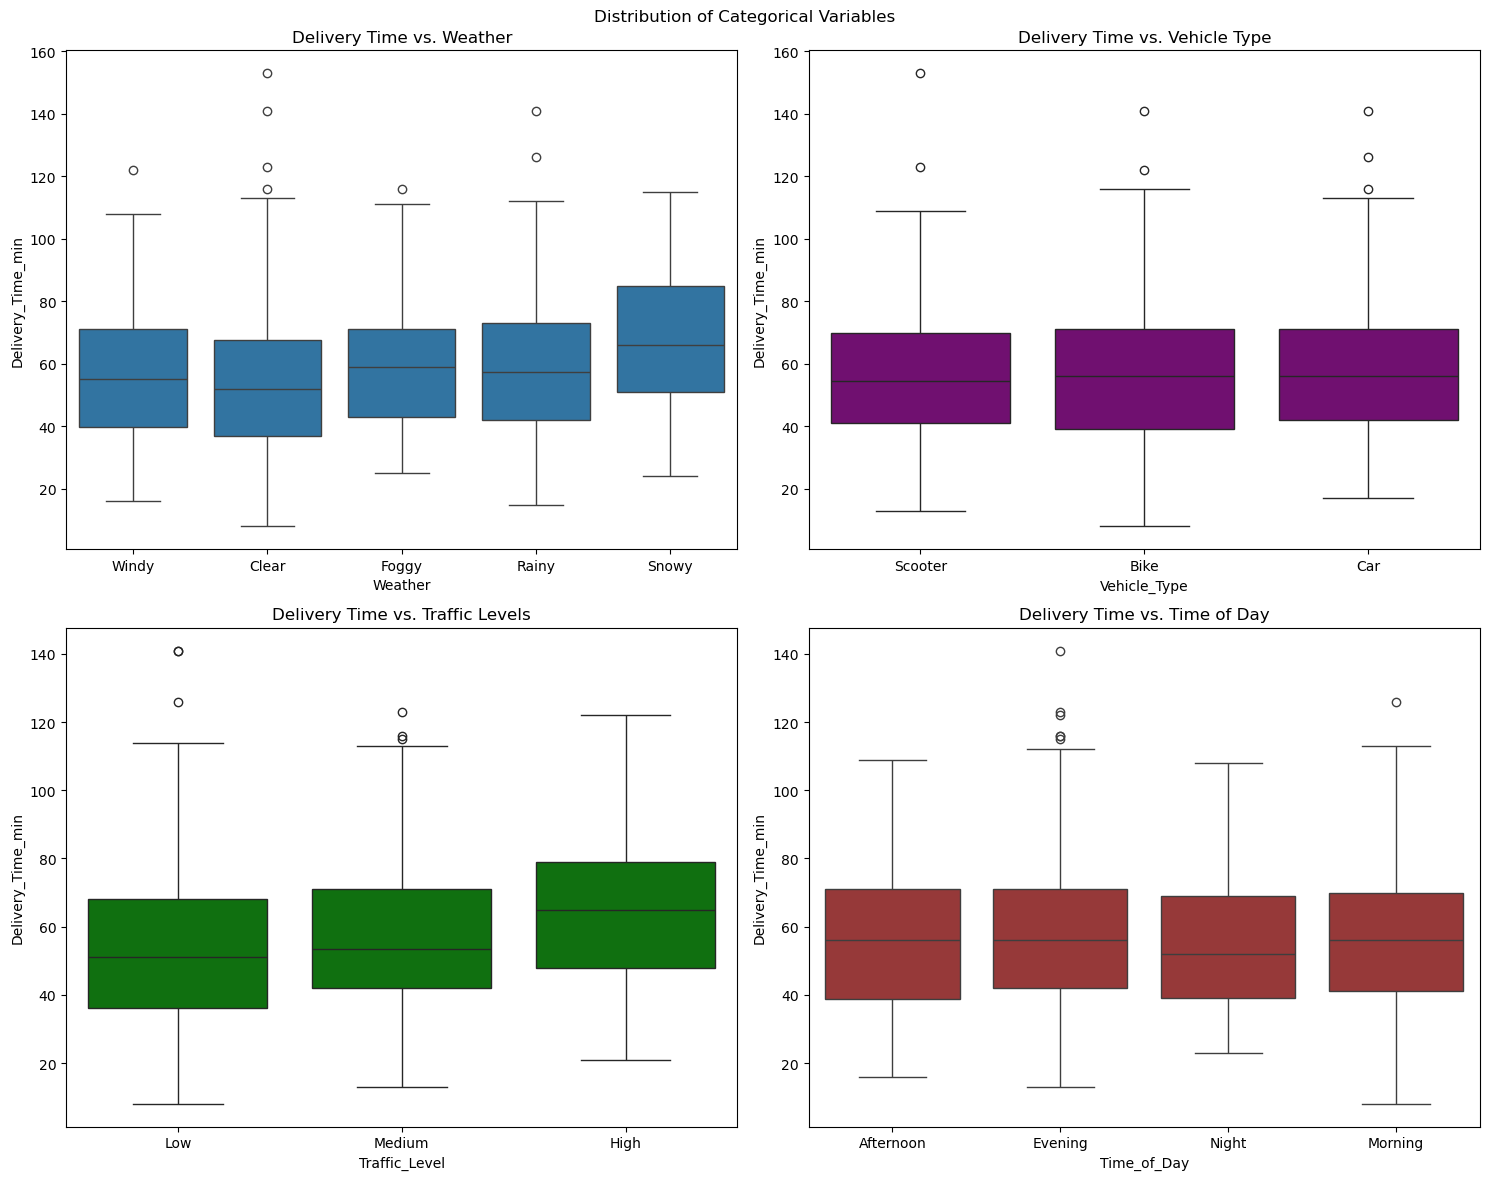

In [17]:
# Plot frequency distributions
fig, axs = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle('Distribution of Categorical Variables')

sns.boxplot(data=df, x='Weather', y='Delivery_Time_min', ax=axs[0,0])
axs[0,0].set_title('Delivery Time vs. Weather')

sns.boxplot(data=df, x='Vehicle_Type', y='Delivery_Time_min', color='purple', ax=axs[0,1])
axs[0,1].set_title('Delivery Time vs. Vehicle Type')

sns.boxplot(data=df, x='Traffic_Level', y='Delivery_Time_min', color='green', ax=axs[1,0])
axs[1,0].set_title('Delivery Time vs. Traffic Levels')

sns.boxplot(data=df, x='Time_of_Day', y='Delivery_Time_min', color='brown', ax=axs[1,1])
axs[1,1].set_title('Delivery Time vs. Time of Day')

plt.tight_layout()
plt.show()

Visualize numeric data against the target (Delivery Time)

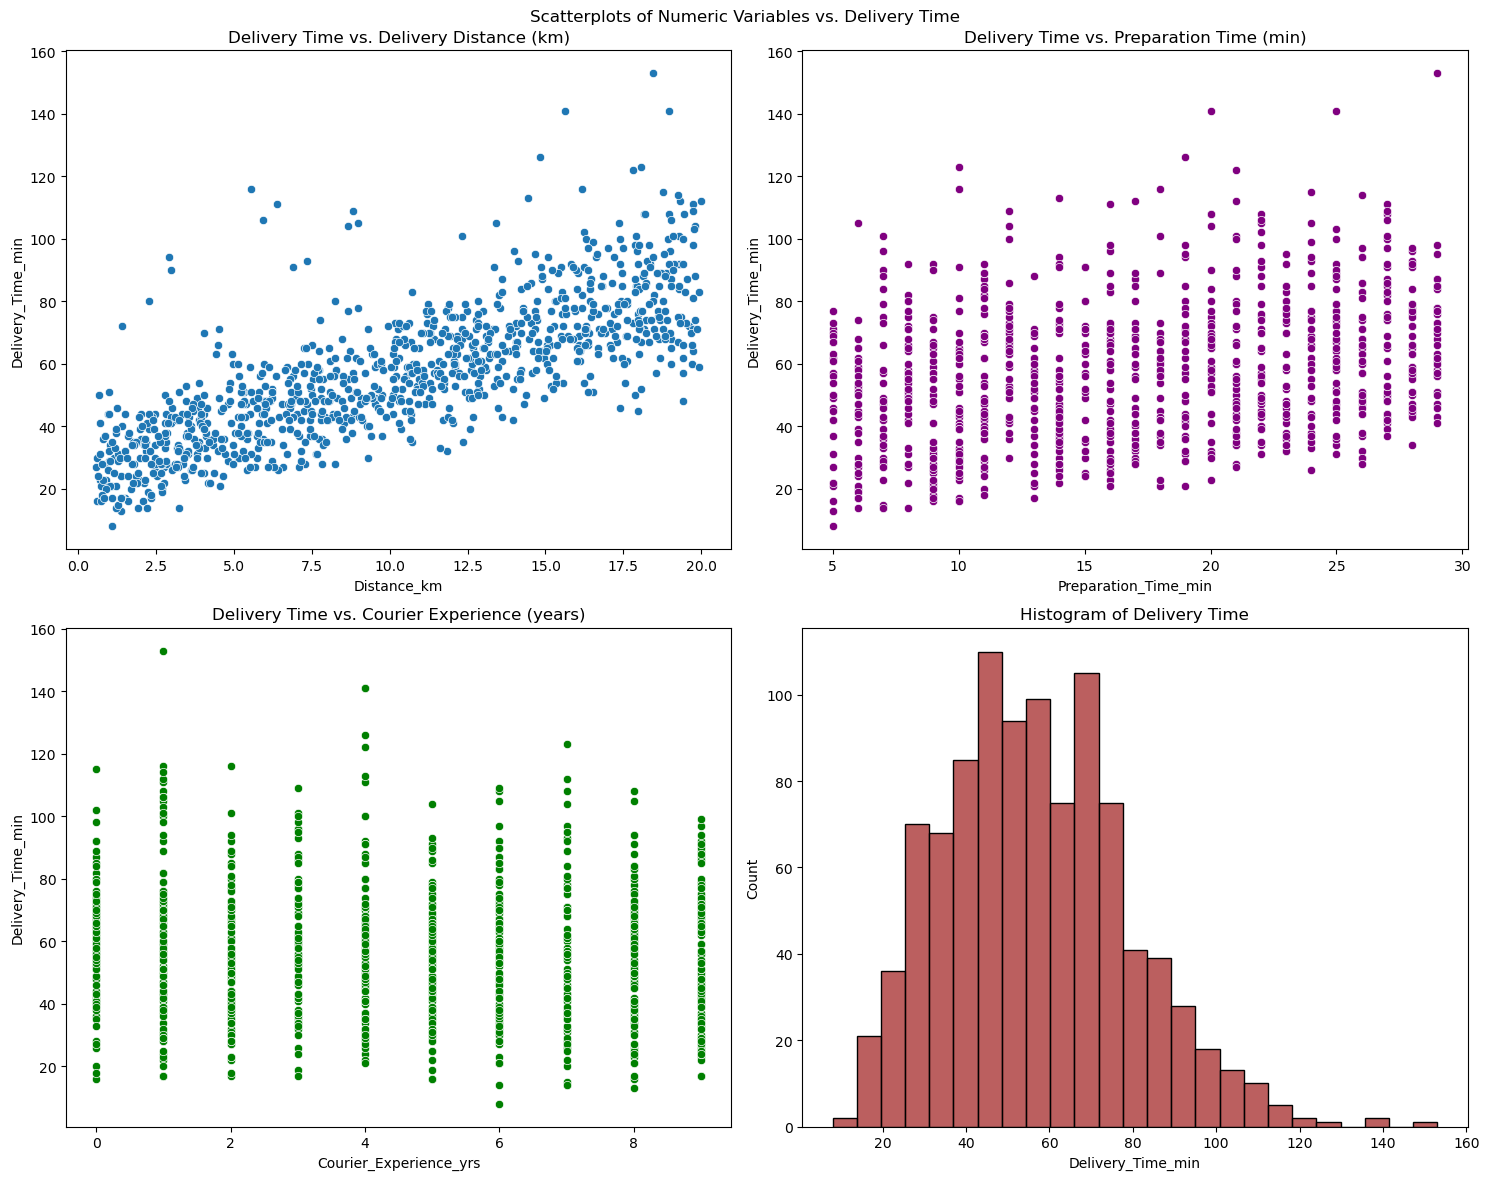

In [33]:
# Plot numeric relationships
fig, axs = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle('Scatterplots of Numeric Variables vs. Delivery Time')

sns.scatterplot(data=df, x='Distance_km', y='Delivery_Time_min', ax=axs[0,0])
axs[0,0].set_title('Delivery Time vs. Delivery Distance (km)')

sns.scatterplot(data=df, x='Preparation_Time_min', y='Delivery_Time_min', color='purple', ax=axs[0,1])
axs[0,1].set_title('Delivery Time vs. Preparation Time (min)')

sns.scatterplot(data=df, x='Courier_Experience_yrs', y='Delivery_Time_min', color='green', ax=axs[1,0])
axs[1,0].set_title('Delivery Time vs. Courier Experience (years)')

sns.histplot(data=df, x='Delivery_Time_min', color='brown', ax=axs[1,1])
axs[1,1].set_title('Histogram of Delivery Time')

plt.tight_layout()
plt.show()

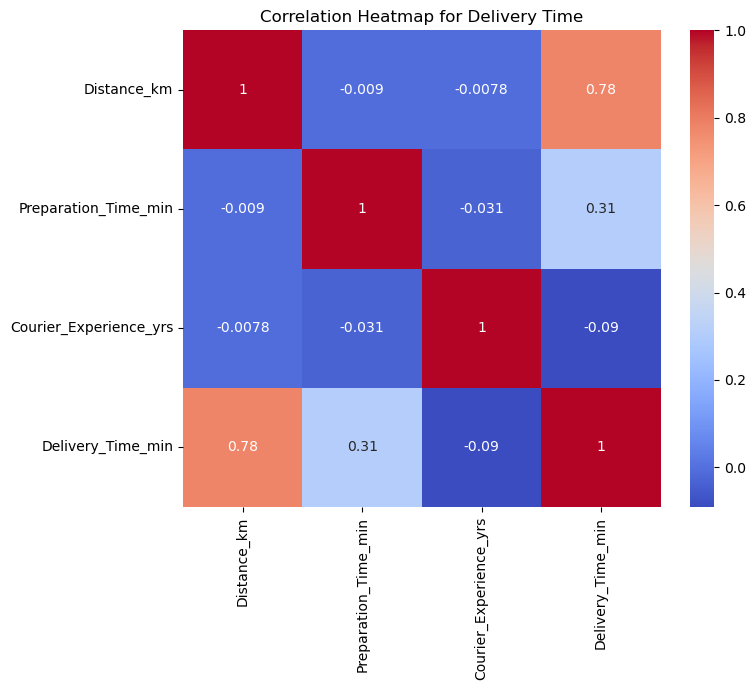

In [37]:
# Calculate correlations
correlations = df[['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8,7))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Delivery Time')
plt.tight_layout()
plt.show()

Based on the visualizations, traffic level appears to be closely related to delivery time compared to the other catagorical features; there is a distinct increase in delivery time as the traffic level increases. Weather is also an important feature, as snowy weather has a strong potential to increase delivery time.

As for numeric features, delivery distance has the greatest correlation with delivery time, so a linear regression model should utilize delivery distance as its predictor feature. Preparation time also has the potential to improve model performance, as the scatterplot shows a weak positive relationship between preparation time and delivery time.

### **Baseline Prediction**

Establish a simple benchmark by predicting the average delivery time for every order, regardless of the input features.

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def create_benchmark(df):
    """Returns a NumPy array where every prediction is the mean delivery time."""
    # Calculate the average delivery time
    avg_delivery_time = df['Delivery_Time_min'].mean()

    # Fill a numpy array with the avg. time
    avg_delivery_time_array = np.full(len(df), avg_delivery_time) # np.full(shape, fill_value)

    return avg_delivery_time_array

def evaluate_baseline(df):
    """Computes RMSE and R² for the benchmark model."""
    y_true = df['Delivery_Time_min']
    y_pred = create_benchmark(df)

    # Compute Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Compute R^2 score
    r2 = r2_score(y_true, y_pred)

    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

# Call evaluate the baseline model
evaluate_baseline(df)

RMSE: 22.06
R² Score: 0.00


$R^2$ represents the percentage of the variance in the dependent varaible that can be explained by the independent variable(s). However, since we evaluated the baseline model (which is just the average of the dependent variable), we didn't actually test any independent variables. Therefore, $R^2$ explains zero variance in the dependent variable. An $R^2$ of zero indicates that the model provides no improvement over the simplest possible prediction. 

Mathematically, $R^2 = 1 - \frac{RSS}{TSS}$, where RSS = residual sum of squares and TSS = total sum of squares. The TSS is the sum of squared differences between the actual values and the mean. Since the baseline model is solely the mean value, the residuals are just the differences between actual values and the mean, making RSS equal to TSS. Thus, $\frac{RSS}{TSS} = 1$ and the equation becomes $R^2 = 1 - 1 = 0$.


### **Implement a Simple Linear Regression Model**

Handle missing values:

In [ ]:
from sklearn.impute import SimpleImputer

# Select categorical columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill in missing values (categorical) using mode
if df[categorical_cols].isnull().values.any():
  imputer = SimpleImputer(strategy ='most_frequent')
  df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fill in missing values (numeric) using mean
if df[numeric_cols].isnull().values.any():
  imputer = SimpleImputer(strategy='mean')
  df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [ ]:
# Check that all missing values were filled
df.isnull().values.any()

False

Train and evaluate a linear regression model that predicts delivery time based on delivery distance. 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define variables and reshape to 2D arrays (column vectors)
X = np.array(df['Distance_km']).reshape(-1,1)
y = np.array(df['Delivery_Time_min']).reshape(-1,1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Initialize model
linreg_model = LinearRegression()

# Train model
linreg_model.fit(X_train, y_train)

# Predict delivery times (y)
y_pred = linreg_model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 11.73
R² Score: 0.68


**Plot results of the linear regression:** As x increases (delivery distance), y also increases (delivery time). The farther away the delivery location, the more time it takes to deliver the order.

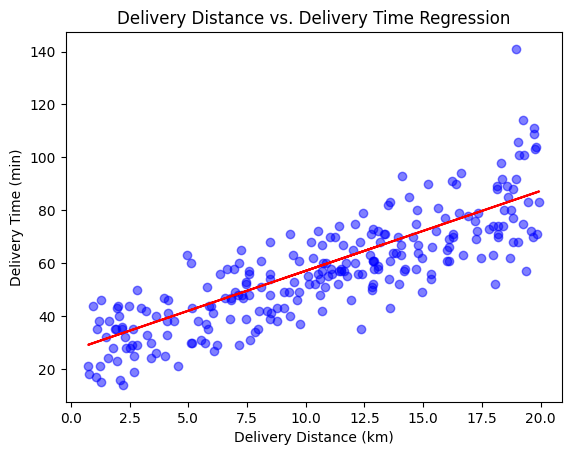

In [14]:
# Plot distance and delivery time regression
plt.scatter(X_test, y_test, alpha=0.5, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Delivery Distance vs. Delivery Time Regression')
plt.xlabel('Delivery Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.show()

### **Multi-Linear Regression Model**

**Scatter plot of Preparation Time and Delivery Distance:** There doesn't appear to be a relationship between the two variables because the points are randomly scattered. Thus, the model will have less difficulties measuring each feature's individual effects on the dependent variable (no multicolinearity), so the model can use both features at the same time.

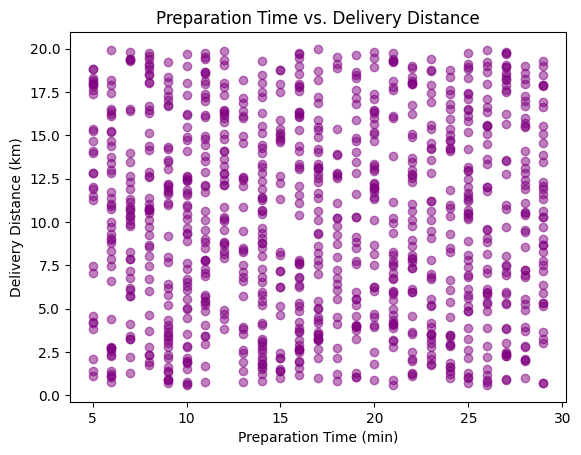

In [15]:
# Define variables
x2 = df['Preparation_Time_min']
y2 = df['Distance_km']

plt.scatter(x2, y2, alpha=0.5, color='purple')
plt.title('Preparation Time vs. Delivery Distance')
plt.xlabel('Preparation Time (min)')
plt.ylabel('Delivery Distance (km)')
plt.show()

Train and evaluate a multilinear regression model that predicts delivery time based on delivery distance and preparation time.

In [16]:
# Define variables
X3 = np.array(df[['Distance_km', 'Preparation_Time_min']]).reshape(-1,2)
y3 = np.array(df['Delivery_Time_min']).reshape(-1,1)

# Split data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)

# Initialize model
mult_linreg_model = LinearRegression()

# Train model
mult_linreg_model.fit(X3_train, y3_train)

# Predict delivery times (y)
y3_pred = mult_linreg_model.predict(X3_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))
r2 = r2_score(y3_test, y3_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 12.95
R² Score: 0.66


### **Visualize the Multi-Linear Regression Model**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


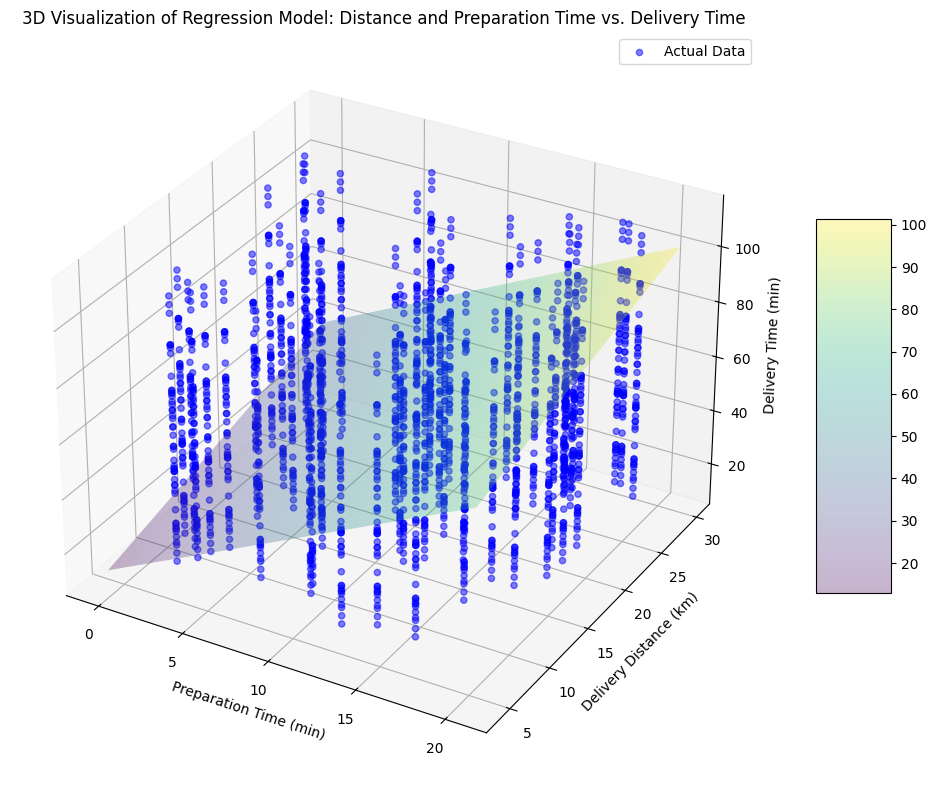

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Actual data points
X = X3_test
y = y3_test

# Plot sample of actual data points
sample_size = 50
ax.scatter(X[:sample_size, 0], X[:sample_size, 1], y[:sample_size],
           c='blue', marker='o', alpha=0.5, label='Actual Data')

# Plot actual data points
#ax.scatter(X[:, 0], X[:, 1], y3, c='blue', marker='o', alpha=0.5, label='Actual Data (sample size = 50)')

# Create meshgrid for prediction surface
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

# Generate predictions for the surface
mesh_X = np.column_stack((xx1.ravel(), xx2.ravel()))
mesh_X_df = pd.DataFrame(mesh_X, columns=['Distance_km', 'Preparation_Time_min'])
Z = mult_linreg_model.predict(mesh_X_df)
Z = Z.reshape(xx1.shape)

# Plot prediction surface
surf = ax.plot_surface(xx1, xx2, Z, cmap='viridis', alpha=0.3)

# Set labels
plt.title('3D Visualization of Regression Model: Distance and Preparation Time vs. Delivery Time')
ax.set_xlabel('Preparation Time (min)')
ax.set_ylabel('Delivery Distance (km)')
ax.set_zlabel('Delivery Time (min)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.legend()
plt.tight_layout()
plt.show()

### **Final Thoughts**

The linear regression model (distance vs. delivery time) has a higher $RMSE$ than the multiple linear regression model (distance & preparation time vs. delivery time). This indicates that the multiple linear regression has a better "fit" and the average predicted values are closer to the actual values than the single linear regression.

The single linear regression model has a lower $R^2$ than the multiple linear regression, which indicates that delivery distance and preparation time have a stronger relationship together to delivery time than just delivery distance alone.

Based on the $RMSE$ and $R^2$, the multiple linear regression model performs better at predicting delivery time. This could be the case because taking both delivery distance and preparation time into consideration could make the model more nuanced. For example, even if the delivery distance is short, the preparation time could be long, causing the overall delivery time to be greater. The model wouldn't have this nuance if it just used a single feature.